### O objetivo deste desafio de Data Science é utilizar os dados disponíveis para medir a probabilidade de sobrevivência dos passageiros do Titanic.

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

In [2]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(test.shape)
print(train.shape)

(418, 11)
(891, 12)


In [5]:
print(test.info())
print('\n')
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   P

### Verificando os valores nulos, que métodos utilizaremos pra lidar com eles?

In [6]:
train.isnull().sum().sort_values(ascending=False) #em ordem descrescente

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [7]:
test.isnull().sum().sort_values(ascending=False) 

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

### Cabine tem muitos valores nulos, se modificarmos pode ficar tendencioso, será que não é mais interessante excluirmos dos dados?
### Que outras variáveis podemos perceber que podem não influenciar na sobrevivência?

### Substituindo valores nulos nas variáveis age e embarked (train), e age e fare(test)

No caso da idade, a distribuição de valores é muito grande e arbitrar um valor vai distorcer muito os dados. 
Nesse caso, usaremos o valor médio da idade.

Poderíamos ter deixado pra concatenar os dados e limpar tudo em um ds só, mas preferi fazer deste modo.

In [8]:
#Dropango variáveis que acreditei não influenciarem no resultado. 
#Talvez com uma análise mais minuciosa, poderíamos ter deixado a ticket, mas preferi tirá-la.

test.drop('Cabin',axis=1,inplace=True)
train.drop('Cabin',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)
train.drop('Ticket',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)
train.drop('Name',axis=1,inplace=True)

train.drop(['PassengerId'], axis=1) #Eu não vou soltá-lo do conjunto de testes, já que é necessário para o envio

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [9]:
train["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [10]:
# 1º Train Data

#age
age_mean = train["Age"].mean()
train["Age"].fillna(age_mean,inplace=True)

#Embarked, valor com maior frequencia mais aconselhável p categórica
embarked_mode = train["Embarked"].value_counts()[0]
train["Embarked"].fillna(embarked_mode,inplace=True)

train.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [11]:
# 2º Test Data
#filling the missing data

#age
age_mean = test["Age"].mean()
test["Age"].fillna(age_mean,inplace=True)

#fare
fare_median = train["Fare"].median()
test["Fare"].fillna(fare_median, inplace=True)

test.isnull().sum().sort_values(ascending=False)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Análise Exploratória

In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Analise por pareamento

Podemos analisar rapidamente as correlações entre os atributos colocando-os uns contra os outros. Só podemos fazer isso neste estágio para recursos que não possuem valores vazios. Também faz sentido fazer isso apenas para recursos do tipo categórico (Sexo), ordinal (Pclass) ou discreto (SibSp, Parch)


In [13]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


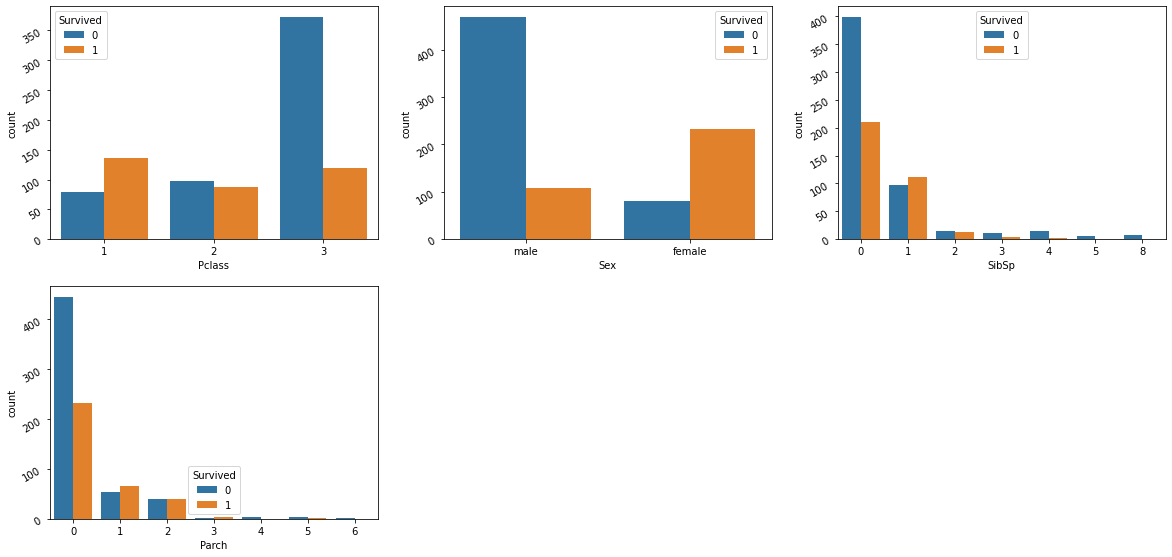

In [17]:
#Análise gráfica

x= ["Pclass","Sex","SibSp","Parch"]
list(enumerate(x))

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(20,30))

for i in enumerate(x):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(i[1], hue="Survived", data=train)
    plt.yticks(rotation=30)

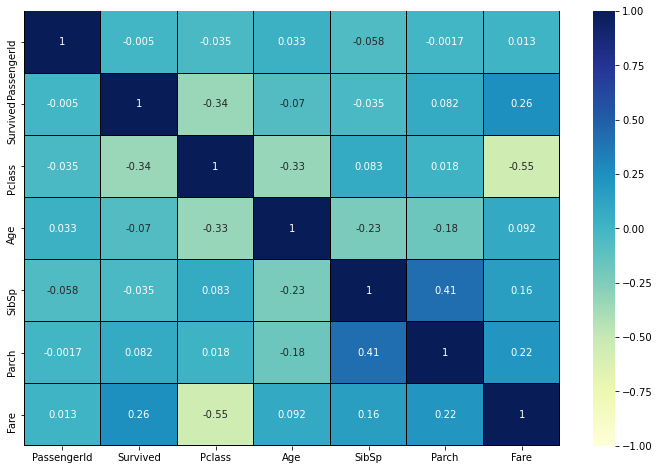

In [18]:
var_num_corr = train.corr()

plt.figure(figsize = [12, 8])
sns.heatmap(var_num_corr,  vmin=-1, vmax=1, linewidth=0.01, linecolor='black', cmap='YlGnBu', annot=True) #chama seaborn
plt.show()

### Juntando os ds de treino e teste

In [19]:
#Salvando índices p posterior recuperação
train_i = train.shape[0]
test_i = test.shape[0]

In [20]:
#salvar PassID para submissão ao Kaggle
passengerId = test["PassengerId"]

#extrair coluna "Survived" e excluir ela do ds treino
target= train.Survived.copy()
train.drop(["Survived"], axis=1, inplace=True)

In [21]:
#concatenar treino e teste em um df

df_merged = pd.concat(objs=[train,test],axis = 0).reset_index(drop=True)
print("df_merged.shape:({}x{})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape:(1309x8)


### Preparar as variáveis pro modelo

O modelo matemático exige que trabalhemos com variáveis numéricas, ou seja, temos transformar os dados de entrada que estão em formato categoria para números. Na variável Embarked, aplicou-se o conceito de variáveis dummies. As variáveis dummies (dummy variables) assumem aqui apenas valores 0 e 1, criando uma nova coluna para cada valor possível da variável categórica. 

In [22]:
#Sex em 0 e 1

df_merged["Sex"]= df_merged["Sex"].map({"male":0,"female":1})

# Dummies para Embarked

embarked_dummies = pd.get_dummies(df_merged["Embarked"],
                   prefix="Embarked")
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop("Embarked", axis=1, inplace=True)

display(df_merged.head())

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_644,Embarked_C,Embarked_Q,Embarked_S
0,1,3,0,22.0,1,0,7.2500,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,3,1,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,3,0,35.0,0,0,8.0500,0,0,0,1


### Recuperando os datasets de treino e teste
 Dividir df_merged em train e test, exatamente como era no começo. 

In [23]:
train = df_merged.iloc[:train_i]
test = df_merged.iloc[train_i:]

In [24]:
train.isnull().sum().sort_values(ascending=False)

PassengerId     0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked_644    0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

### Construção do Modelo e Avaliação

#### 1º Modelo de Regressão Logística

In [25]:
from sklearn.linear_model import LogisticRegression

#criando modelo
lr_model = LogisticRegression(solver="liblinear")
lr_model.fit(train,target)

#verificar a acurácia
acc_logReg= round(lr_model.score(train,target)*100,2)
print("Acurácia do LR: {}".format(acc_logReg))


Acurácia do LR: 80.13


#### 2º Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

#criando modelo
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train,target)

#verificar a acurácia
acc_tree= round(tree_model.score(train,target)*100,2)
print("Acurácia do DT: {}".format(acc_tree))


Acurácia do DT: 82.72


Da mesma maneira acha-se a curva (fit) em cima dos dados de treino e verifica-se a acurácia dele. Um pequeno ganho na acurácia, chegando agora a quase 83%.

#### 3º Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

#criando modelo
randomforest_model = RandomForestClassifier(max_depth=3)
randomforest_model.fit(train,target)

#verificar a acurácia
acc_randomforest_model= round(randomforest_model.score(train,target)*100,2)
print("Acurácia do Random Forest: {}".format(acc_randomforest_model))

Acurácia do Random Forest: 83.28


### Submetendo os resultados 

In [28]:
#Regressão Logística
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId":passengerId,
    "Survived": y_pred_lr
})

submission.to_csv('./submission_lr.csv',index=False)

#Árvore de Decisão

y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId":passengerId,
    "Survived": y_pred_tree
})

submission.to_csv('./submission_tree.csv',index=False)

# Random Forest

y_pred_randomforest = randomforest_model.predict(test)

submission = pd.DataFrame({
    "PassengerId":passengerId,
    "Survived":y_pred_randomforest
})
